Statistics: You need to analyse the data using statistical logic and statistical techniques. You are required to: 
Summarize your data using Descriptive Statistics: Central Tendency, Measures of variability and graphs. You are required to plot at least two graphs.

In [368]:
# Import the libraries and Warning filters

import pandas as pd
import numpy as np
import seaborn as sns
import statistics as st
import matplotlib.pyplot as plt
%matplotlib inline

import warnings 
warnings.filterwarnings('ignore')

In [369]:
# Import the DataFrame .csv

data = pd.read_csv('BirthsByCounty1985_2020.csv')
data.head(10)

,Year,County,All Births (Number),First Births (Number),Births within Marriage (Number),Births outside Marriage (Number),Average Age of Mother (Years),Average Age of First Time Mother (Years)
0,1985,ROI Total,62388.0,NaN,57106.0,5282.0,29.3,26.0
1,1985,Dublin City,6645.0,NaN,5132.0,1513.0,28.0,NaN
2,1985,Fingal,NaN,NaN,NaN,NaN,NaN,NaN
3,1985,Dun Laoghaire Rathdown,878.0,NaN,754.0,124.0,29.8,NaN
4,1985,South Dublin,10123.0,NaN,9280.0,843.0,29.3,NaN
5,1985,Wicklow,1829.0,NaN,1634.0,195.0,28.9,NaN
6,1985,Carlow,832.0,NaN,773.0,59.0,28.8,NaN
7,1985,Kildare,2466.0,NaN,2290.0,176.0,29.3,NaN
8,1985,Kilkenny,1286.0,NaN,1190.0,96.0,29.5,NaN
9,1985,Laois,941.0,NaN,895.0,46.0,29.4,NaN


In [370]:
# Check the size of our DataFrame

data.shape

(1332, 8)

In [371]:
# Check the information on the DataFrame

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1332 entries, 0 to 1331
Data columns (total 8 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Year                                      1332 non-null   int64  
 1   County                                    1332 non-null   object 
 2   All Births (Number)                       1259 non-null   float64
 3   First Births (Number)                     1087 non-null   object 
 4   Births within Marriage (Number)           1259 non-null   float64
 5   Births outside Marriage (Number)          1259 non-null   float64
 6   Average Age of Mother (Years)             1259 non-null   float64
 7   Average Age of First Time Mother (Years)  1125 non-null   float64
dtypes: float64(5), int64(1), object(2)
memory usage: 83.4+ KB


In [372]:
# Renaming columns with space to be easier handled

data = data.rename(columns={'All Births (Number)':'All_Births','Births within Marriage (Number)':'Births_within_Marriage','First Births (Number)':'First_Births','Births outside Marriage (Number)':'Births_outside_Marriage','Average Age of Mother (Years)':'Average_Age_of_Mother','Average Age of First Time Mother (Years)':'Average_Age_of_First_Time_Mother' })
data.head()

,Year,County,All_Births,First_Births,Births_within_Marriage,Births_outside_Marriage,Average_Age_of_Mother,Average_Age_of_First_Time_Mother
0,1985,ROI Total,62388.0,NaN,57106.0,5282.0,29.3,26.0
1,1985,Dublin City,6645.0,NaN,5132.0,1513.0,28.0,NaN
2,1985,Fingal,NaN,NaN,NaN,NaN,NaN,NaN
3,1985,Dun Laoghaire Rathdown,878.0,NaN,754.0,124.0,29.8,NaN
4,1985,South Dublin,10123.0,NaN,9280.0,843.0,29.3,NaN


 Excluding counties and using ROI Total as data to be analized

In [373]:
data = data.loc[(data['County'] == 'ROI Total')]
data.shape

(36, 8)

In [374]:
#Checking if successfully eliminated county rows
data['County'].unique()

array(['ROI Total'], dtype=object)

In [375]:
# Check the data

data.head(40)

,Year,County,All_Births,First_Births,Births_within_Marriage,Births_outside_Marriage,Average_Age_of_Mother,Average_Age_of_First_Time_Mother
0,1985,ROI Total,62388.0,NaN,57106.0,5282.0,29.3,26.0
37,1986,ROI Total,61620.0,NaN,55674.0,5946.0,29.3,26.1
74,1987,ROI Total,58433.0,NaN,52086.0,6347.0,29.4,26.2
111,1988,ROI Total,54600.0,NaN,48117.0,6483.0,29.5,26.4
148,1989,ROI Total,52018.0,16994,45347.0,6671.0,29.6,26.3
185,1990,ROI Total,53044.0,17738,45277.0,7767.0,29.6,26.3
222,1991,ROI Total,52718.0,18130,43806.0,8912.0,29.6,26.3
259,1992,ROI Total,51089.0,17864,41878.0,9211.0,29.7,26.4
296,1993,ROI Total,49304.0,17330,39478.0,9826.0,29.8,26.6
333,1994,ROI Total,48255.0,17009,38206.0,10049.0,29.9,26.8


Excuding NA values taht could distorce the analysis

In [376]:
data.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36 entries, 0 to 1295
Data columns (total 8 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Year                              36 non-null     int64  
 1   County                            36 non-null     object 
 2   All_Births                        36 non-null     float64
 3   First_Births                      32 non-null     object 
 4   Births_within_Marriage            36 non-null     float64
 5   Births_outside_Marriage           36 non-null     float64
 6   Average_Age_of_Mother             36 non-null     float64
 7   Average_Age_of_First_Time_Mother  36 non-null     float64
dtypes: float64(5), int64(1), object(2)
memory usage: 2.5+ KB


In [377]:
# Rename the DataFrame as births_df to drop NaN values
births_df=data

In [378]:
# Drop missing values (NaN) and store result in births_df
births_df = births_df.dropna()

In [379]:
births_df.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32 entries, 148 to 1295
Data columns (total 8 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Year                              32 non-null     int64  
 1   County                            32 non-null     object 
 2   All_Births                        32 non-null     float64
 3   First_Births                      32 non-null     object 
 4   Births_within_Marriage            32 non-null     float64
 5   Births_outside_Marriage           32 non-null     float64
 6   Average_Age_of_Mother             32 non-null     float64
 7   Average_Age_of_First_Time_Mother  32 non-null     float64
dtypes: float64(5), int64(1), object(2)
memory usage: 2.2+ KB


[Text(0, 0, '1989'),
 Text(1, 0, '1990'),
 Text(2, 0, '1991'),
 Text(3, 0, '1992'),
 Text(4, 0, '1993'),
 Text(5, 0, '1994'),
 Text(6, 0, '1995'),
 Text(7, 0, '1996'),
 Text(8, 0, '1997'),
 Text(9, 0, '1998'),
 Text(10, 0, '1999'),
 Text(11, 0, '2000'),
 Text(12, 0, '2001'),
 Text(13, 0, '2002'),
 Text(14, 0, '2003'),
 Text(15, 0, '2004'),
 Text(16, 0, '2005'),
 Text(17, 0, '2006'),
 Text(18, 0, '2007'),
 Text(19, 0, '2008'),
 Text(20, 0, '2009'),
 Text(21, 0, '2010'),
 Text(22, 0, '2011'),
 Text(23, 0, '2012'),
 Text(24, 0, '2013'),
 Text(25, 0, '2014'),
 Text(26, 0, '2015'),
 Text(27, 0, '2016'),
 Text(28, 0, '2017'),
 Text(29, 0, '2018'),
 Text(30, 0, '2019'),
 Text(31, 0, '2020')]

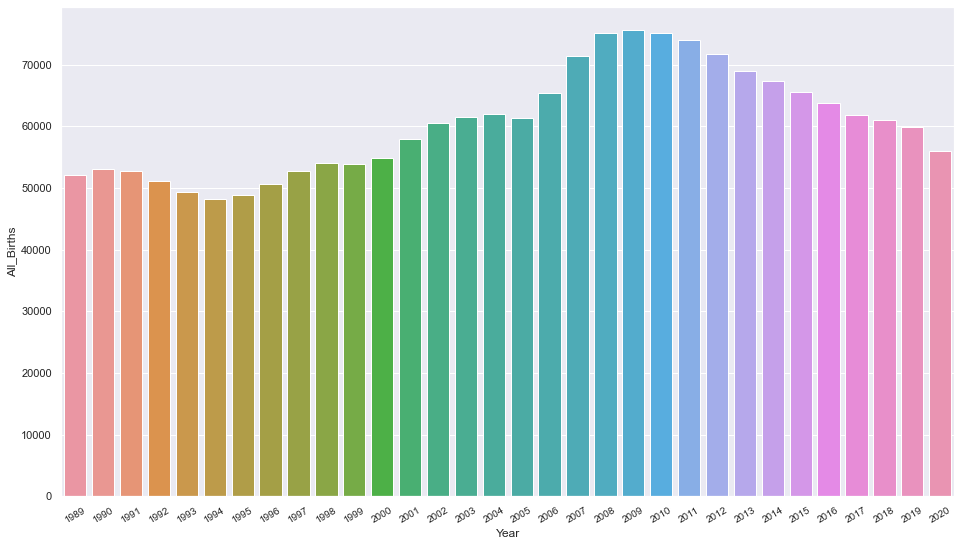

In [380]:
#Chart bellow displaying number of births by year
sns.set()
plt.figure(figsize = (16,9))
ax = sns.barplot(x="Year", y="All_Births", data=births_df, capsize = 2)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=10, rotation=30)

We notice the boom of biths in Ireland was in 2009

Central Tendency, Measures of variability and graphs

In [381]:
# Mean
births_df.mean()

Year                                 2.004500e+03
All_Births                           6.053769e+04
First_Births                        5.310680e+157
Births_within_Marriage               4.200556e+04
Births_outside_Marriage              1.853212e+04
Average_Age_of_Mother                3.104375e+01
Average_Age_of_First_Time_Mother     2.857187e+01
dtype: float64

In [382]:
# Median
births_df.median()

Year                                 2004.5
All_Births                          60762.5
First_Births                        23517.5
Births_within_Marriage              41747.5
Births_outside_Marriage             19649.5
Average_Age_of_Mother                  30.9
Average_Age_of_First_Time_Mother       28.6
dtype: float64

In [383]:
# Mode
births_df.mode()

,Year,County,All_Births,First_Births,Births_within_Marriage,Births_outside_Marriage,Average_Age_of_Mother,Average_Age_of_First_Time_Mother
0,1989,ROI Total,48255.0,16994,34481.0,6671.0,29.6,26.3
1,1990,NaN,48787.0,17009,37024.0,7767.0,30.1,NaN
2,1991,NaN,49304.0,17330,37134.0,8912.0,NaN,NaN
3,1992,NaN,50655.0,17738,37523.0,9211.0,NaN,NaN
4,1993,NaN,51089.0,17760,37858.0,9826.0,NaN,NaN
5,1994,NaN,52018.0,17864,37920.0,10049.0,NaN,NaN
6,1995,NaN,52718.0,18130,37925.0,10862.0,NaN,NaN
7,1996,NaN,52775.0,19216,38206.0,12797.0,NaN,NaN
8,1997,NaN,53044.0,20208,38477.0,14149.0,NaN,NaN
9,1998,NaN,53924.0,21249,38588.0,15492.0,NaN,NaN


In [384]:
# Standard Deviation

St = np.std(births_df)
St

Year                                   9.233093
All_Births                          8404.950574
Births_within_Marriage              4228.523922
Births_outside_Marriage             6020.072325
Average_Age_of_Mother                  1.147262
Average_Age_of_First_Time_Mother       1.683047
dtype: float64

In [385]:
# Variance
Vr = np.var(births_df)
Vr 

Year                                8.525000e+01
All_Births                          7.064319e+07
Births_within_Marriage              1.788041e+07
Births_outside_Marriage             3.624127e+07
Average_Age_of_Mother               1.316211e+00
Average_Age_of_First_Time_Mother    2.832646e+00
dtype: float64

In [386]:
births_df.describe()

,Year,All_Births,Births_within_Marriage,Births_outside_Marriage,Average_Age_of_Mother,Average_Age_of_First_Time_Mother
count,32.000000,32.000000,32.000000,32.000000,32.00000,32.000000
mean,2004.500000,60537.687500,42005.562500,18532.125000,31.04375,28.571875
std,9.380832,8539.438323,4296.184601,6116.399598,1.16562,1.709977
min,1989.000000,48255.000000,34481.000000,6671.000000,29.60000,26.300000
25%,1996.750000,52976.750000,38409.250000,13811.000000,30.07500,27.075000
50%,2004.500000,60762.500000,41747.500000,19649.500000,30.90000,28.600000
75%,2012.250000,65975.750000,44770.000000,23715.500000,32.05000,30.075000
max,2020.000000,75554.000000,50302.000000,25372.000000,33.10000,31.400000


In [387]:
sta_births_df = births_df.describe()

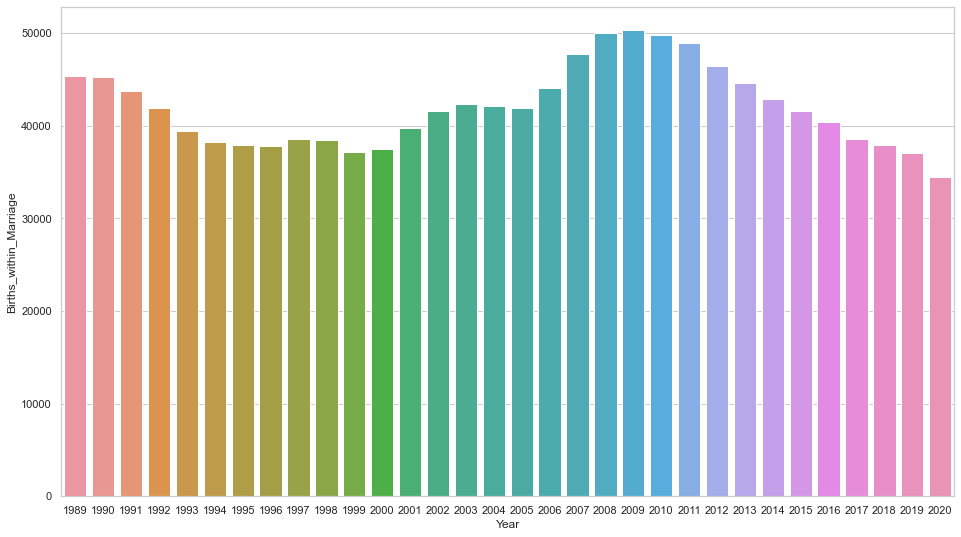

In [388]:
from numpy import median, mean
plt.figure(figsize = (16,9))
sns.set(style="whitegrid")
ax = sns.barplot(x="Year", y="Births_within_Marriage", data=births_df, estimator = mean)

In [389]:
#rearranging rows to better processing and visualization 

list_of_lists = []


for index, row in births_df.iterrows():
    list_of_lists.append([row['Year'],'Births_within_Marriage',row['Births_within_Marriage']])
    list_of_lists.append([row['Year'],'Births_outside_Marriage',row['Births_outside_Marriage']])
    
    
temp_births_df_rearranged = pd.DataFrame(list_of_lists, columns=['Year', 'Type', 'Nbr'])

In [390]:
temp_births_df_rearranged.head()

,Year,Type,Nbr
0,1989,Births_within_Marriage,45347.0
1,1989,Births_outside_Marriage,6671.0
2,1990,Births_within_Marriage,45277.0
3,1990,Births_outside_Marriage,7767.0
4,1991,Births_within_Marriage,43806.0


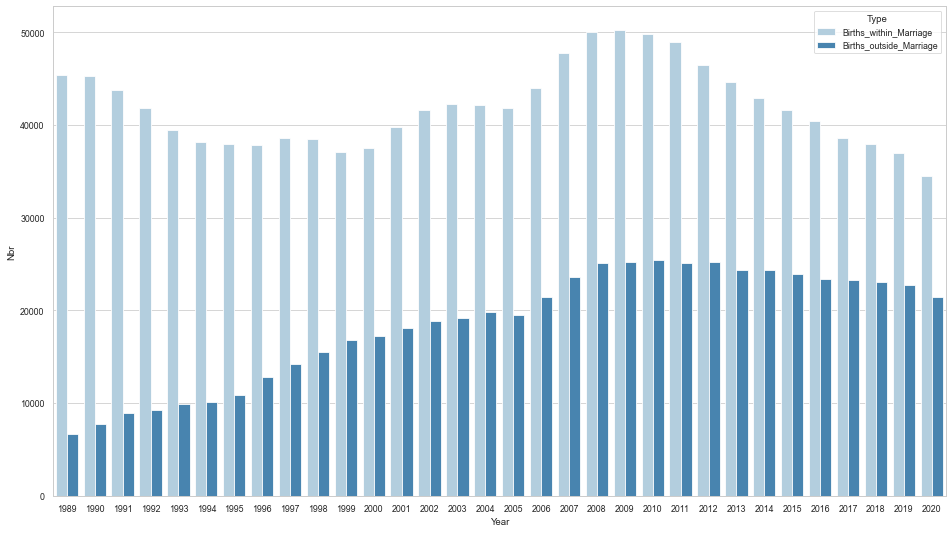

In [391]:
sns.set_context('paper')
plt.figure(figsize = (16,9))
sns.barplot(x = 'Year', y = 'Nbr', hue = 'Type', data = temp_births_df_rearranged,
            palette = 'Blues', edgecolor = 'w')

temp_births_df_rearranged.groupby(['Year','Type'])

plt.show()

In [392]:
temp_births_df_rearranged.describe()

,Year,Nbr
count,64.000000,64.000000
mean,2004.500000,30268.843750
std,9.306083,12939.376485
min,1989.000000,6671.000000
25%,1996.750000,19723.750000
50%,2004.500000,29926.500000
75%,2012.250000,41685.750000
max,2020.000000,50302.000000


In [393]:
stat_temp_births_df_rearranged = temp_births_df_rearranged.describe()

In [394]:
stat_temp_births_df_rearranged.head()

,Year,Nbr
count,64.000000,64.000000
mean,2004.500000,30268.843750
std,9.306083,12939.376485
min,1989.000000,6671.000000
25%,1996.750000,19723.750000


Analisying Births within marriage and outside Marrige we notice we have more births within marriage, but it is declining since 2008 whereas biths outside mariage didn't change that much since 2008. Hence, every year less and less babies are born.

ploting data

In [395]:
%matplotlib inline
import numpy as np
from numpy.random import randn
import pandas as pd
from scipy import stats
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [396]:
births_df.columns

Index(['Year', 'County', 'All_Births', 'First_Births',
       'Births_within_Marriage', 'Births_outside_Marriage',
       'Average_Age_of_Mother', 'Average_Age_of_First_Time_Mother'],
      dtype='object')

Now, let's cross all data

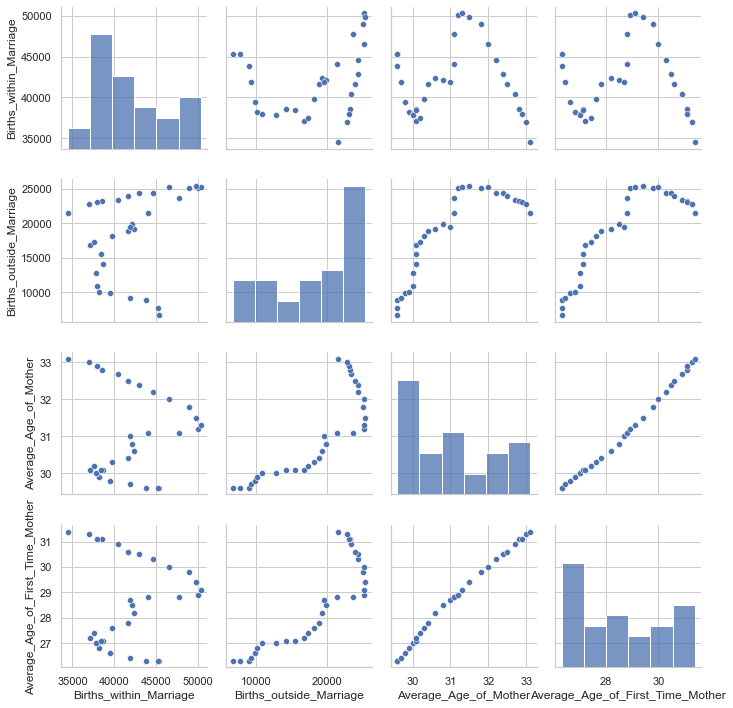

In [397]:
# Set the style for the plot using swaborn library
sns.set(style='whitegrid', context='notebook')

# Consider the following columns from the entire dataset
cols = ['Births_within_Marriage', 'Births_outside_Marriage','Average_Age_of_Mother', 'Average_Age_of_First_Time_Mother']

# Display the pairplot using the above-mentioned columns
sns.pairplot(births_df[cols], height = 2.5)

plt.tight_layout()

# plt.savefig('./figures/scatter.png', dpi=300)
plt.show()

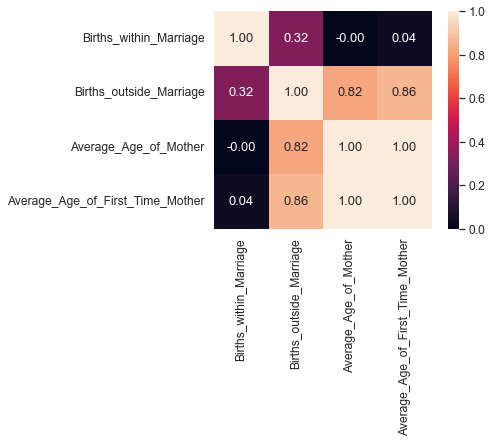

<Figure size 1152x648 with 0 Axes>

In [398]:
import numpy as np

# Initialise an object (cm) using np object
cm = np.corrcoef(births_df[cols].values.T)

# Set the font size of the plot
sns.set(font_scale = 1.1)

hm = sns.heatmap(cm, 
            cbar=True,
            annot=True, 
            square=True,
            fmt='.2f',
            annot_kws={'size': 13},
            yticklabels=cols,
            xticklabels=cols)
plt.figure(figsize = (16,9))
plt.tight_layout()
# plt.savefig('./figures/corr_mat.png', dpi=300)
plt.show()

In [399]:
col_dict = {'Births_within_Marriage':1, 'Births_outside_Marriage':2, 'Average_Age_of_Mother':3,'Average_Age_of_First_Time_Mother':4, 'All_Births':5}

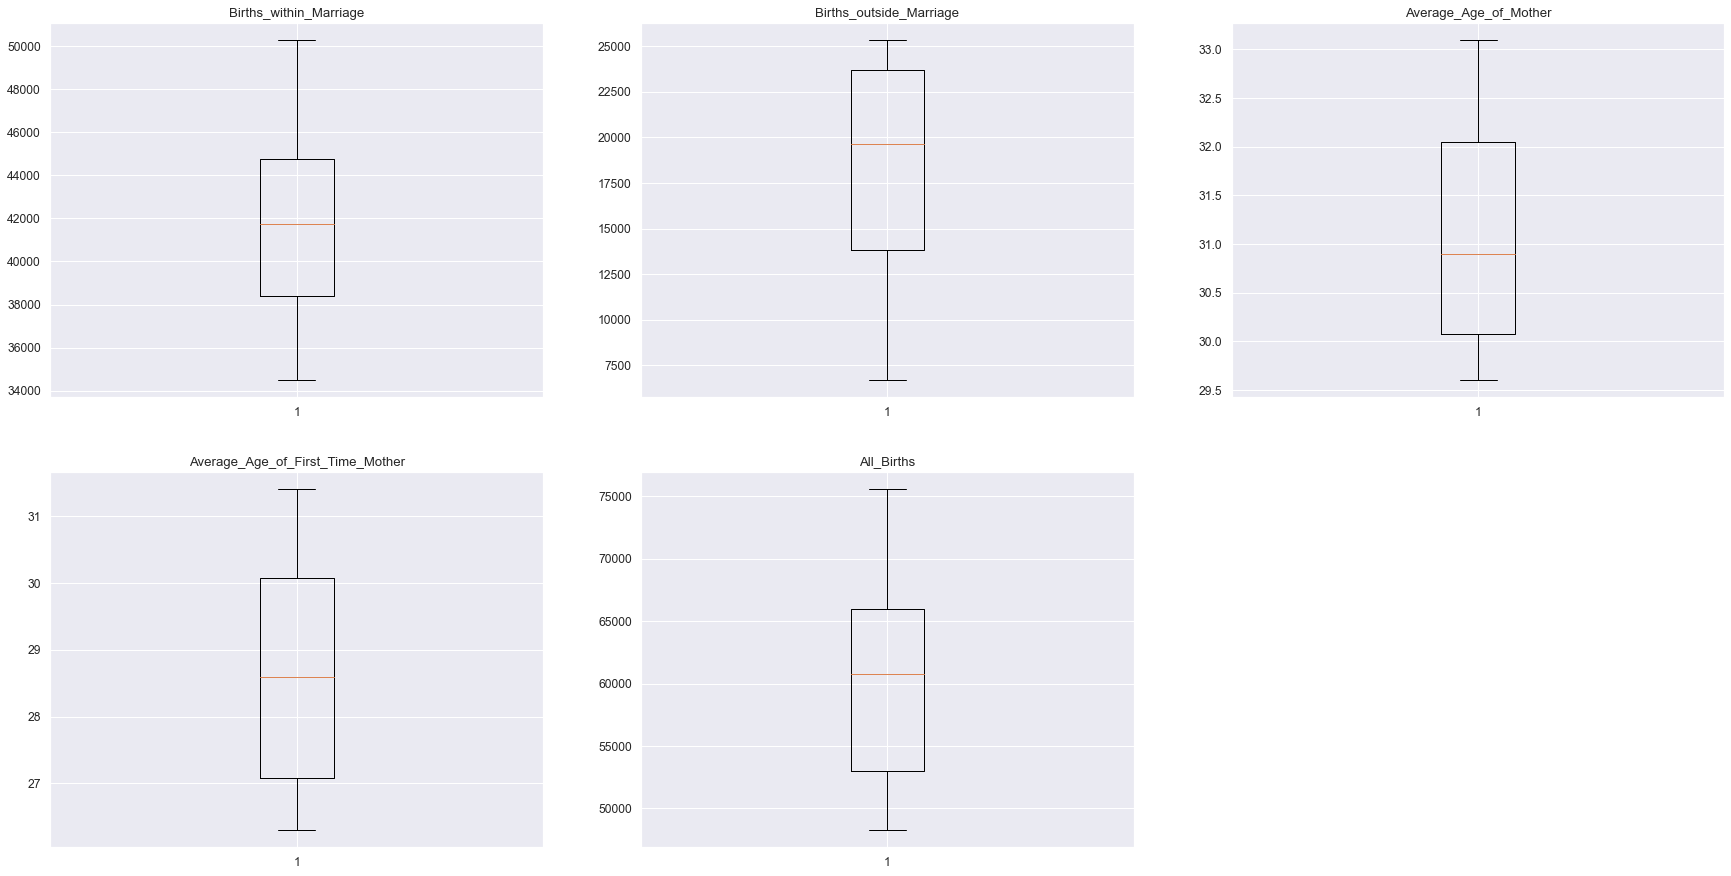

In [400]:
plt.figure(figsize=(30,40))

for variable,i in col_dict.items():
                     plt.subplot(5,3,i)
                     plt.boxplot(births_df[variable],whis=2.5)
                     plt.title(variable)

plt.show()

In [401]:
correlation = births_df.corr()
print(correlation)

                                      Year  All_Births  \
Year                              1.000000    0.668914   
All_Births                        0.668914    1.000000   
Births_within_Marriage            0.040596    0.735531   
Births_outside_Marriage           0.905392    0.879514   
Average_Age_of_Mother             0.981506    0.589846   
Average_Age_of_First_Time_Mother  0.991109    0.635315   

                                  Births_within_Marriage  \
Year                                            0.040596   
All_Births                                      0.735531   
Births_within_Marriage                          1.000000   
Births_outside_Marriage                         0.324511   
Average_Age_of_Mother                          -0.000508   
Average_Age_of_First_Time_Mother                0.036784   

                                  Births_outside_Marriage  \
Year                                             0.905392   
All_Births                                       0

<AxesSubplot:>

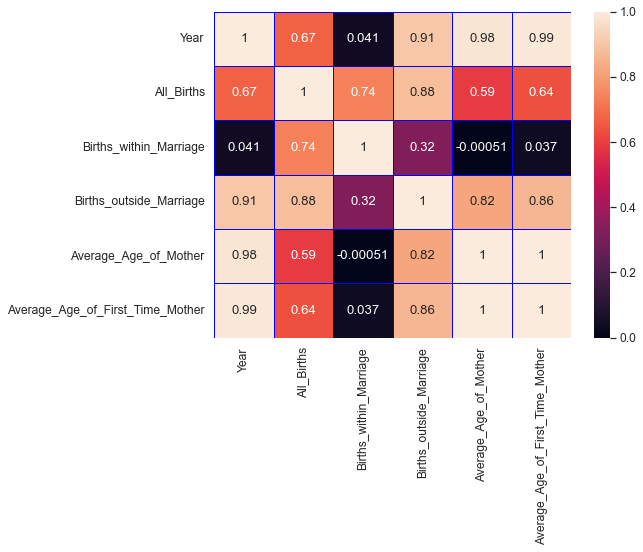

In [402]:
plt.figure(figsize=(8,6))
sns.heatmap(correlation,annot=True,linecolor="blue",lw=0.5)

xxxxxxxxxxxxxxxxxxxxxxxxxxx Machine Learning xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx

In [403]:
# Enconding categorical data as numeric values
#from numpy import asarray
#from sklearn.preprocessing import OrdinalEncoder
from numpy import asarray
from sklearn.preprocessing import OrdinalEncoder

In [404]:
#data 2 1 dimens
data_2 = births_df.Year 

#data 2 2dimen
data_2_2Dim = births_df[['Year']]


In [405]:
X = data_2_2Dim
print(X.values)

[[1989]
 [1990]
 [1991]
 [1992]
 [1993]
 [1994]
 [1995]
 [1996]
 [1997]
 [1998]
 [1999]
 [2000]
 [2001]
 [2002]
 [2003]
 [2004]
 [2005]
 [2006]
 [2007]
 [2008]
 [2009]
 [2010]
 [2011]
 [2012]
 [2013]
 [2014]
 [2015]
 [2016]
 [2017]
 [2018]
 [2019]
 [2020]]


In [406]:
# Define Y 
Y = births_df.All_Births.to_numpy()
print(Y)

[52018. 53044. 52718. 51089. 49304. 48255. 48787. 50655. 52775. 53969.
 53924. 54789. 57854. 60503. 61529. 61972. 61372. 65425. 71389. 75173.
 75554. 75174. 74033. 71674. 68954. 67295. 65536. 63841. 61824. 61022.
 59796. 55959.]


In [407]:
# Check the type of X and Y
print('X type', type(X), 'Y type', type(Y))

X type <class 'pandas.core.frame.DataFrame'> Y type <class 'numpy.ndarray'>


[Text(0.5, 0, 'Poisson'), Text(0, 0.5, 'Frequency')]

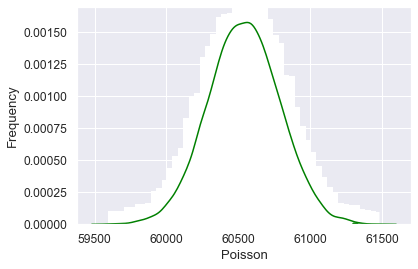

In [408]:
from scipy.stats import poisson
import seaborn as sb

temp_births_df_rearranged_binom = poisson.rvs(mu=60537.687500, size=10000)
ax = sb.distplot(temp_births_df_rearranged_binom,
                  kde=True,
                  color='green',
                  hist_kws={"linewidth": 25,'alpha':1})
ax.set(xlabel='Poisson', ylabel='Frequency')



########################  MACHINE LEARNING - Supervised #################################

In [409]:
# Import the libraries Model Slection and Linear regression
# from sklearn.model_selection import train_test_split
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 30)


from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 30)


In [410]:
# Checking the split on X test and X train 30/70
X_train.shape, X_test.shape


((22, 1), (10, 1))

In [411]:
# Train the LinearRegression mode by using a method fit() function/ method
model = LinearRegression().fit(X_train, Y_train)


In [412]:
# Display the coefficient and intercept values

print("model.coef_: {}".format(model.coef_))
print("model.intercept_: {}".format(model.intercept_))

model.coef_: [568.99480044]
model.intercept_: -1080477.3068733288


In [413]:
# Display the score values 

print("Training set score: {:.2f}".format(model.score(X_train, Y_train)))
print("Test set score: {:.2f}".format(model.score(X_test, Y_test)))

Training set score: 0.44
Test set score: 0.42


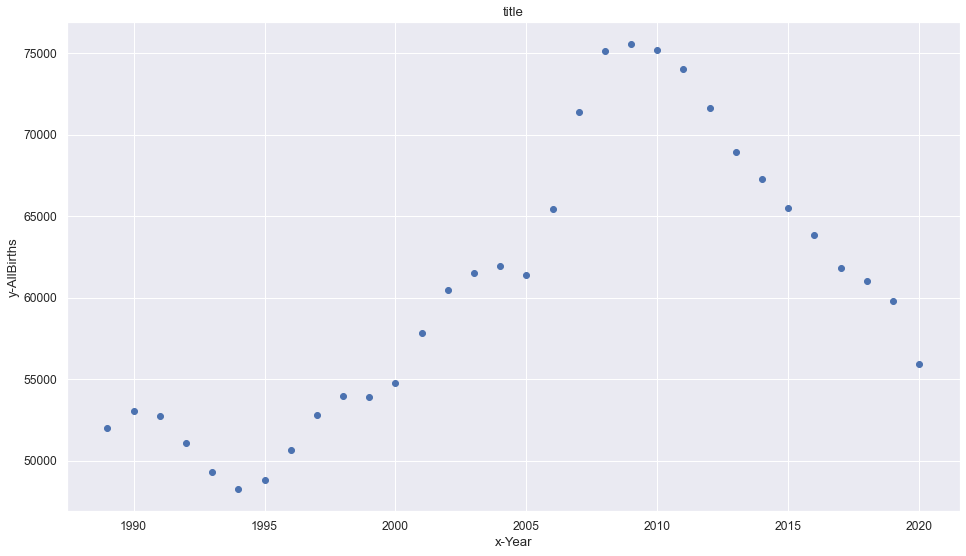

In [414]:
# Scatter plot of all [year/births]

plt.figure(figsize = (16,9))
plt.scatter(X, Y)
plt.title("title")
plt.xlabel("x-Year")
plt.ylabel("y-AllBirths")

plt.show()

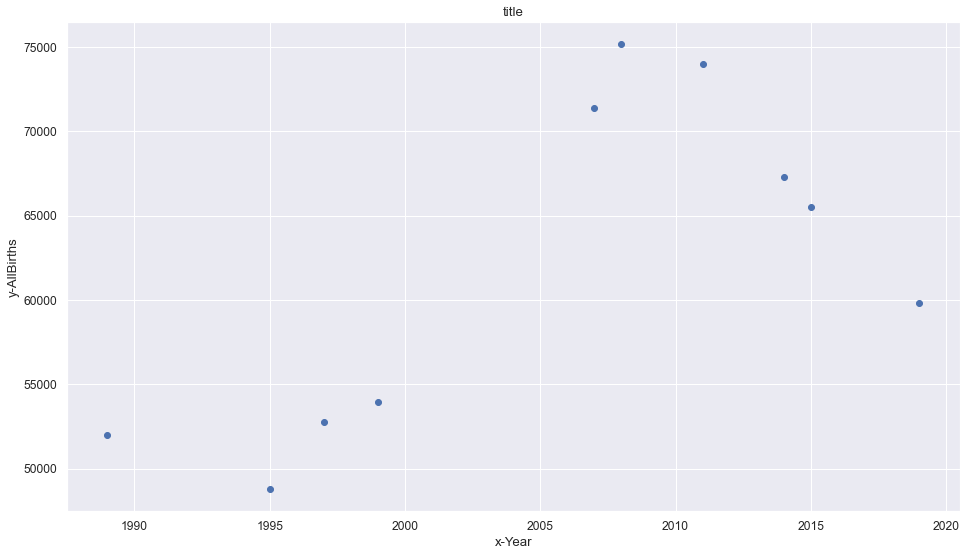

In [415]:
# X_test and Y_test plot

plt.figure(figsize = (16,9))
plt.scatter(X_test, Y_test)
plt.title("title")
plt.xlabel("x-Year")
plt.ylabel("y-AllBirths")

plt.show()

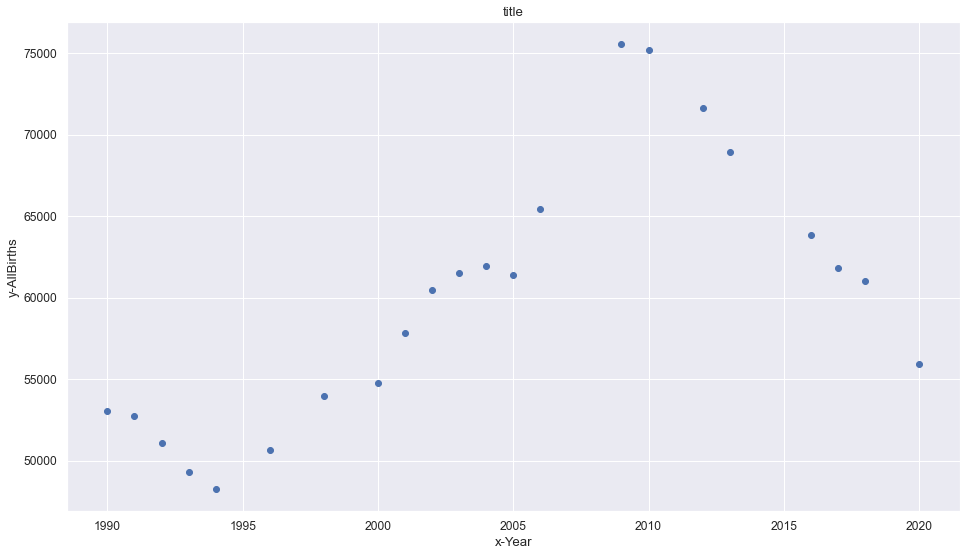

In [416]:
# X_train and Y_train plot

plt.figure(figsize = (16,9))
plt.scatter(X_train, Y_train)
plt.title("title")
plt.xlabel("x-Year")
plt.ylabel("y-AllBirths")

plt.show()

In [417]:
from scipy import stats

In [418]:
slope, intercept, r, p, std_err = stats.linregress(data_2, Y)

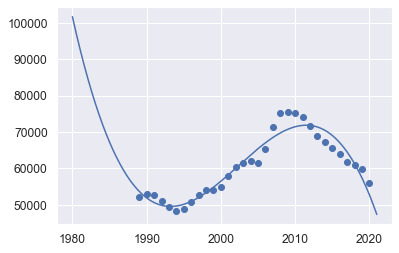

In [419]:
mymodel = np.poly1d(np.polyfit(data_2, Y, 3))
myline = np.linspace(1980, 2021, 60000)

plt.scatter(data_2, Y)
plt.plot(myline, mymodel(myline))
plt.show()

In [420]:
#R-Squared
#It is important to know how well the relationship between the values of the x- and y-axis is, if there are no relationship the polynomial regression can not be used to predict anything.
#The relationship is measured with a value called the r-squared.
#The r-squared value ranges from 0 to 1, where 0 means no relationship, and 1 means 100% related.

from sklearn.metrics import r2_score
print(r2_score(Y, mymodel(data_2)))

0.9189080524198645


In [421]:
#Testing our machine larning
births_2025 = mymodel(2025)
print(births_2025)

17024.063674926758


In [422]:
births = 1
year = 2021

while (births > 0):
    births = mymodel(year)
    year = year + 1
    
print(year - 2)

2026


Concusion: as coding above, in three years will not have childs borning in Ireland

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxx Machine Learning unsupervised model xxxxxxxxxxxxxxxxxxxxxxxx

In [423]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
%matplotlib notebook
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

In [424]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [425]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(max_depth = 3, random_state = 0)
classifier.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [426]:
Y_pred = classifier.predict(X_test)

<IPython.core.display.Javascript object>


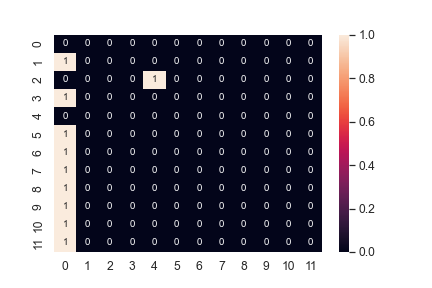

              precision    recall  f1-score   support

     48255.0       0.00      0.00      0.00       0.0
     48787.0       0.00      0.00      0.00       1.0
     52018.0       0.00      0.00      0.00       1.0
     52775.0       0.00      0.00      0.00       1.0
     53044.0       0.00      0.00      0.00       0.0
     53924.0       0.00      0.00      0.00       1.0
     59796.0       0.00      0.00      0.00       1.0
     65536.0       0.00      0.00      0.00       1.0
     67295.0       0.00      0.00      0.00       1.0
     71389.0       0.00      0.00      0.00       1.0
     74033.0       0.00      0.00      0.00       1.0
     75173.0       0.00      0.00      0.00       1.0

    accuracy                           0.00      10.0
   macro avg       0.00      0.00      0.00      10.0
weighted avg       0.00      0.00      0.00      10.0



In [427]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Calculate cm by calling a method named as 'confusion_matrix'
cm = confusion_matrix(Y_test, Y_pred)

# Call a method heatmap() to plot confusion matrix
sns.heatmap(cm, annot = True)

# print the classification_report based on y_test and y_predict
print(classification_report(Y_test, Y_pred))

In [ ]:
classifier = KNeighborsClassifier(n_neighbors=8) classifier.fit(X_train, Y_train)

classes = {0:'Births',1:'Few Births',2:'Many Births'}

x_new =[0,1] Y_predict = rnc.predict(X_test) print(classes[Y_predict[0]]) print(classes[Y_predict[1]])

from sklearn.ensemble import RandomForestClassifier clf = RandomForestClassifier(random_state=0) from sklearn.preprocessing import StandardScaler X = [[0, 15], [1, -10]]

X = [[2020], [2021]]

scale data according to computed scaling values
StandardScaler().fit(X).transform(X) np.array([[-1., 1.], [ 1., -1.]])

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=0)
from sklearn.preprocessing import StandardScaler
X = [[1989],
     [2021]]
 # scale data according to computed scaling values
StandardScaler().fit(X).transform(X)
np.array([[-1.,  1.],
       [ 1., -1.]])

In [433]:
Range_k = (3,3)
scores = {}
scores_list = []

for k in Range_k:
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(X_train, Y_train)
    Y_pred = classifier.predict(X_test)
    scores[k] = metrics.accuracy_score(Y_test, Y_pred)
    scores_list.append(metrics.accuracy_score(Y_test, Y_pred))
result = metrics.confusion_matrix(Y_test, Y_pred)
print("Confusion Matrix:")
print(result)
result1 = metrics.classification_report(Y_test, Y_pred)
print("Classification report:")
print (result)


Confusion Matrix:
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]]
Classification report:
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 

In [430]:
from sklearn.neighbors import RadiusNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 1)
classifier.fit(X_train, Y_train)
rnc = RadiusNeighborsClassifier(radius = 5)
rnc.fit(X_train, Y_train)

RadiusNeighborsClassifier(radius=5)

In [431]:
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)
rnc = RadiusNeighborsClassifier(radius = 5)
rnc.fit(X_train, Y_train)

RadiusNeighborsClassifier(radius=5)

In [432]:
classes = {0:'Births',1:'Few Births',2:'Many Births'}
X_new = [[2025]]
Y_predict = rnc.predict(X_new)
print(classes[Y_predict])

ValueError: No neighbors found for test samples array([0], dtype=int64), you can try using larger radius, giving a label for outliers, or considering removing them from your dataset.


There's no enough data for Machine Learning unsupervised model 